In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score,classification_report
from matplotlib.image import imread

In [2]:
data_dir = "E:\\Machine Learning\\flowers-recognition\\flowers"

In [3]:
train_dir = data_dir + "\\train"
test_dir = data_dir + "\\test"

# List of species of flowers we have

In [4]:
for folder in os.listdir(train_dir):
    print(folder)

daisy
dandelion
rose
sunflower
tulip


# Getting a random daisy and dandelion picture

In [5]:
rand_daisy = os.listdir(train_dir+"\\daisy")[random.randint(0,509)] 

In [6]:
rand_daisy

'4268817944_cdbdb226ae.jpg'

In [7]:
rand_daisy = plt.imread(train_dir+"\\daisy\\"+rand_daisy)

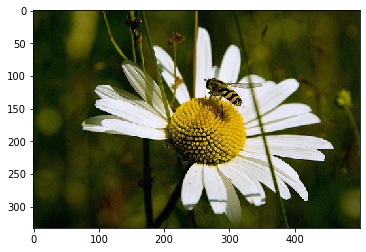

In [8]:
plt.imshow(rand_daisy)

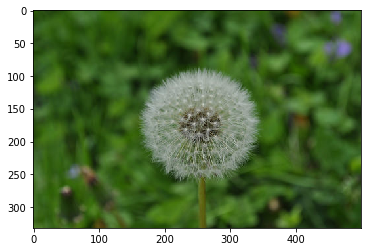

In [9]:
rand_dandelion = os.listdir(train_dir+"\\dandelion")[random.randint(0,509)]
rand_dandelion = plt.imread(train_dir+"\\dandelion\\"+rand_dandelion)
plt.imshow(rand_dandelion)

In [10]:
print(rand_daisy.shape)
print(rand_dandelion.shape)

(333, 500, 3)
(332, 500, 3)


# Getting an appropriate input shape for our images by getting the average dimensions

In [11]:
dim1 = []
dim2 = []

for species in os.listdir(train_dir):
    for image_file in os.listdir(train_dir+"\\"+species):
        img = plt.imread(train_dir+"\\"+species+"\\"+image_file)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

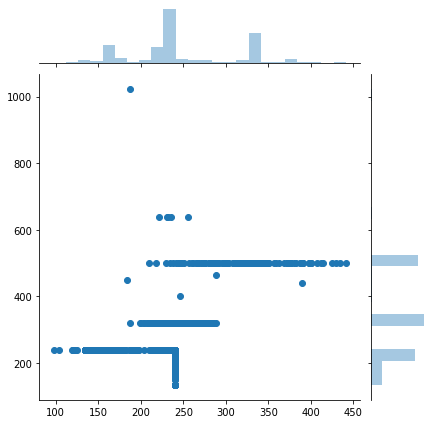

In [12]:
sns.jointplot(dim1,dim2)

In [13]:
np.mean(dim1)

249.25868342705922

In [14]:
np.mean(dim2)

330.9381409196163

In [15]:
image_shape = (250,330,3)

# Making an Image Generator and seeing how it transforms a random dandelion image

In [16]:
image_gen = ImageDataGenerator(rotation_range = 20,                         
                              width_shift_range=0.1,    
                              height_shift_range=0.1,
                               rescale=1/255,
                              shear_range= 0.1,             
                              zoom_range=0.1,              
                              horizontal_flip=True,        
                               fill_mode = 'nearest')       

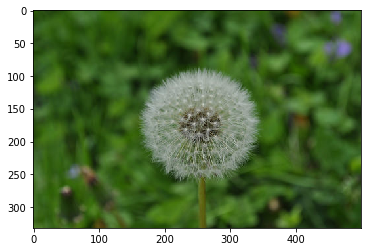

In [17]:
plt.imshow(rand_dandelion)

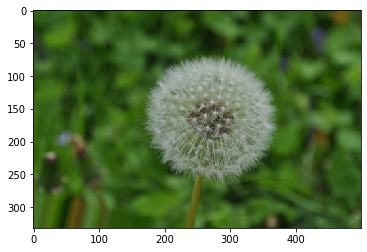

In [18]:
plt.imshow(image_gen.random_transform(rand_dandelion))

In [19]:
image_gen.flow_from_directory(train_dir)

Found 3023 images belonging to 5 classes.


In [20]:
image_gen.flow_from_directory(test_dir)

Found 1300 images belonging to 5 classes.


# Making our model

In [21]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5, activation = "softmax"))

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 330, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 165, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 165, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 82, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 41, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 41, 128)       7

In [24]:
batch_size = 8

# Generating our training and test images

In [25]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3023 images belonging to 5 classes.


In [26]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle = False)

Found 1300 images belonging to 5 classes.


In [27]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [28]:
stop = EarlyStopping(patience = 3, monitor = 'val_loss')

# Training

In [29]:
results = model.fit_generator(train_image_gen,
                             epochs=100,
                             validation_data=test_image_gen,
                             callbacks = [stop])

Epoch 1/100
378/378 [==============================] - 80s 211ms/step - loss: 1.5539 - accuracy: 0.2732 - val_loss: 1.4560 - val_accuracy: 0.3031
Epoch 2/100
378/378 [==============================] - 78s 206ms/step - loss: 1.4241 - accuracy: 0.3503 - val_loss: 1.2864 - val_accuracy: 0.4692
Epoch 3/100
378/378 [==============================] - 78s 205ms/step - loss: 1.1443 - accuracy: 0.5336 - val_loss: 1.1643 - val_accuracy: 0.5054
Epoch 4/100
378/378 [==============================] - 77s 204ms/step - loss: 1.0572 - accuracy: 0.5852 - val_loss: 0.9574 - val_accuracy: 0.6254
Epoch 5/100
378/378 [==============================] - 82s 217ms/step - loss: 0.9973 - accuracy: 0.6027 - val_loss: 0.9188 - val_accuracy: 0.6308
Epoch 6/100
378/378 [==============================] - 83s 219ms/step - loss: 0.9512 - accuracy: 0.6239 - val_loss: 0.9542 - val_accuracy: 0.6031
Epoch 7/100
378/378 [==============================] - 83s 220ms/step - loss: 0.9161 - accuracy: 0.6381 - val_loss: 0.8912 -

In [30]:
history = pd.DataFrame(model.history.history)

# Plotting accuracy and validation accuracy

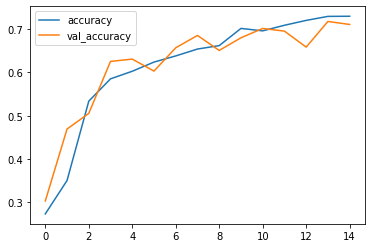

In [31]:
history[['accuracy','val_accuracy']].plot()

# Plotting loss and validation loss

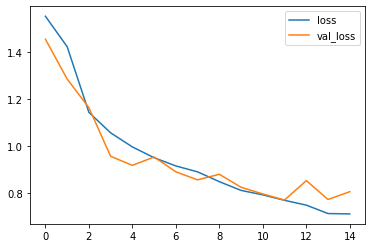

In [32]:
history[['loss','val_loss']].plot()

# Getting predictions which predict the probabilty of each class then turning the class with the highest probabilty as the prediction

In [33]:
pred_prob = model.predict_generator(test_image_gen)

In [34]:
pred_prob

array([[6.91332519e-02, 8.50065529e-01, 1.63368247e-02, 3.88009623e-02,
        2.56635025e-02],
       [5.12774706e-01, 3.15853477e-01, 1.21017396e-02, 1.09702565e-01,
        4.95674908e-02],
       [3.16983074e-01, 1.41249165e-01, 2.08972245e-01, 4.12987918e-02,
        2.91496694e-01],
       ...,
       [2.56062159e-03, 5.15207357e-04, 4.19201106e-02, 3.96107584e-02,
        9.15393233e-01],
       [2.15853170e-01, 1.60104781e-01, 2.16059417e-01, 1.12983130e-01,
        2.94999510e-01],
       [2.42819486e-04, 1.52018358e-04, 2.79016346e-02, 1.56179443e-03,
        9.70141709e-01]], dtype=float32)

In [35]:
preds = pred_prob.argmax(axis=-1) 

In [36]:
preds

array([1, 0, 0, ..., 4, 4, 4], dtype=int64)

# Checking model accuracy

In [37]:
print(test_image_gen.classes)

[0 0 0 ... 4 4 4]


In [38]:
print(classification_report(test_image_gen.classes,preds))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81       260
           1       0.70      0.85      0.77       260
           2       0.79      0.29      0.43       260
           3       0.74      0.87      0.80       260
           4       0.53      0.79      0.63       260

    accuracy                           0.70      1300
   macro avg       0.74      0.70      0.69      1300
weighted avg       0.74      0.70      0.69      1300



In [39]:
print(accuracy_score(test_image_gen.classes,preds))

0.7015384615384616
